In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('model_features_round1_classic_historical.csv')
print(df.shape)
df.head()

(477, 25)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,ovr_rating_bpi,ovr_rating_kenpom,...,def_rating_kenpom,reb%_off,ftr_off,reb%_def,size,3p%_off,ft%_def,eff_def,s_f,a_f
0,2008,East,First Round,1,2008 North Carolina,16,2008 Mount St. Mary's,1,20.7,29.18545,...,9.042927,9.4,0.5,-1.3,1.68,5.7,-3.1,-6.0079,1,0
1,2008,East,First Round,8,2008 Indiana,9,2008 Arkansas,0,2.9,4.63860,...,-4.277710,4.7,6.2,-8.7,0.03,1.8,-3.0,-10.5337,0,0
2,2008,East,First Round,5,2008 Notre Dame,12,2008 George Mason,1,5.5,8.91740,...,-8.541372,8.8,7.5,-1.2,0.95,8.2,-5.8,-11.8408,0,0
3,2008,East,First Round,4,2008 Washington St.,13,2008 Winthrop,1,8.4,16.59767,...,8.569871,-0.9,6.0,-3.7,1.94,7.1,12.6,-6.9188,0,0
4,2008,East,First Round,6,2008 Oklahoma,11,2008 Saint Joseph's,1,0.2,0.50930,...,-8.784226,-0.6,5.5,-2.5,-0.50,-2.1,1.2,-15.3288,0,0


In [92]:
df2 = df.drop(columns=['year', 
                       'region', 
                       'round', 
                       'high_bracket_seed', 
                       'high_bracket_team', 
                       'low_bracket_seed', 
                       'low_bracket_team'
                      ])
print(df2.shape)
df2.head()

(477, 18)


,win,ovr_rating_bpi,ovr_rating_kenpom,ovr_rating_torvik,wab,off_rating_kenpom,off_rating_torvik,def_rating_bpi,def_rating_kenpom,reb%_off,ftr_off,reb%_def,size,3p%_off,ft%_def,eff_def,s_f,a_f
0,1,20.7,29.18545,0.509808,21.357266,20.743966,19.333980,3.2,9.042927,9.4,0.5,-1.3,1.68,5.7,-3.1,-6.0079,1,0
1,0,2.9,4.63860,0.046077,4.216333,8.914142,5.215950,-1.4,-4.277710,4.7,6.2,-8.7,0.03,1.8,-3.0,-10.5337,0,0
2,1,5.5,8.91740,0.142182,7.948582,17.527605,14.339014,-0.4,-8.541372,8.8,7.5,-1.2,0.95,8.2,-5.8,-11.8408,0,0
3,1,8.4,16.59767,0.216638,9.156335,8.030960,4.095147,17.9,8.569871,-0.9,6.0,-3.7,1.94,7.1,12.6,-6.9188,0,0
4,1,0.2,0.50930,0.026038,4.042367,9.625769,6.447339,0.8,-8.784226,-0.6,5.5,-2.5,-0.50,-2.1,1.2,-15.3288,0,0


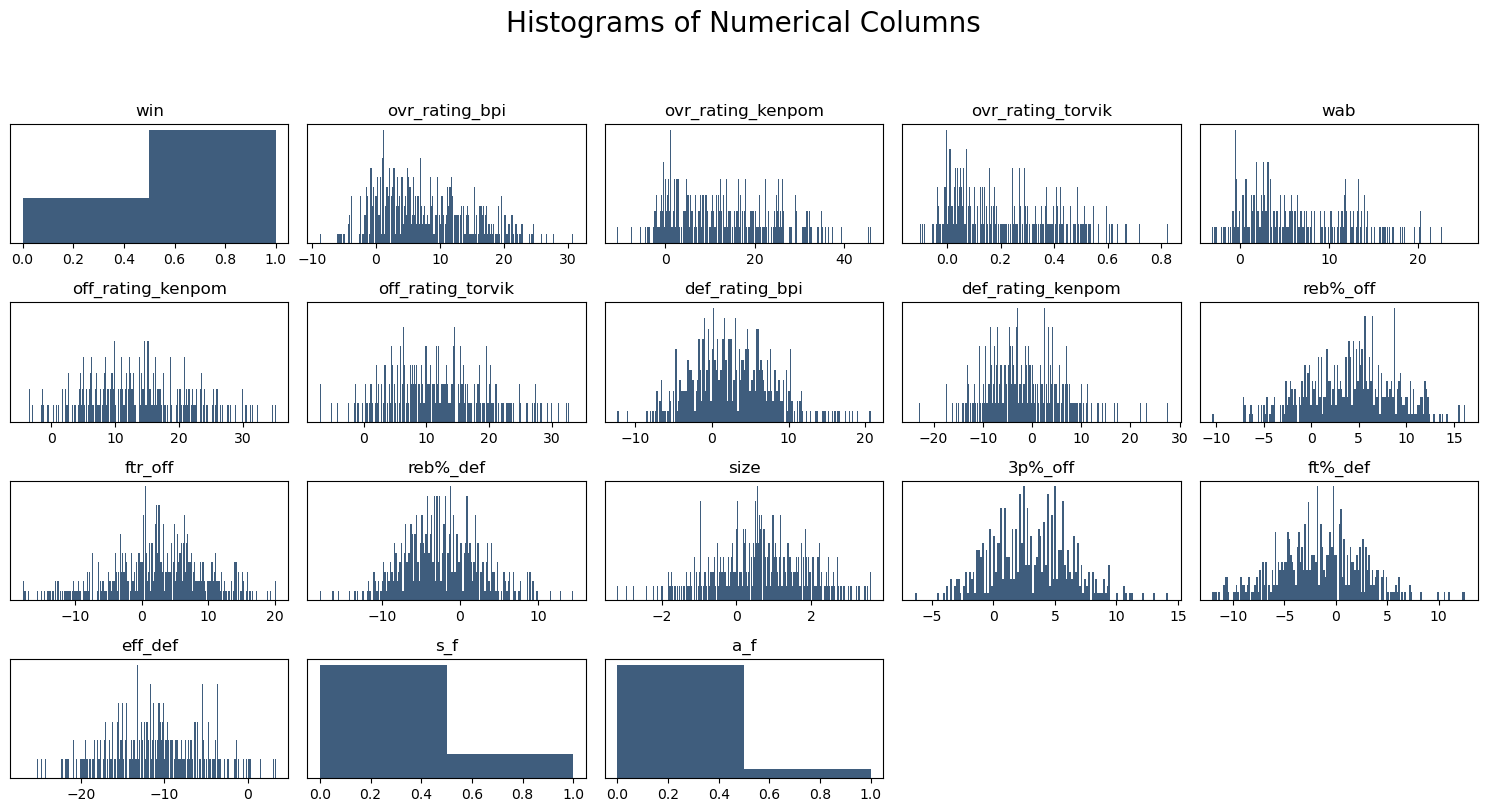

In [93]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, df2.shape[1]+1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
    
    vals = np.size(df2.iloc[:,i-1].unique())
    plt.hist(df2.iloc[:,i-1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

<Axes: title={'center': 'Correlation with the Response Variable'}>

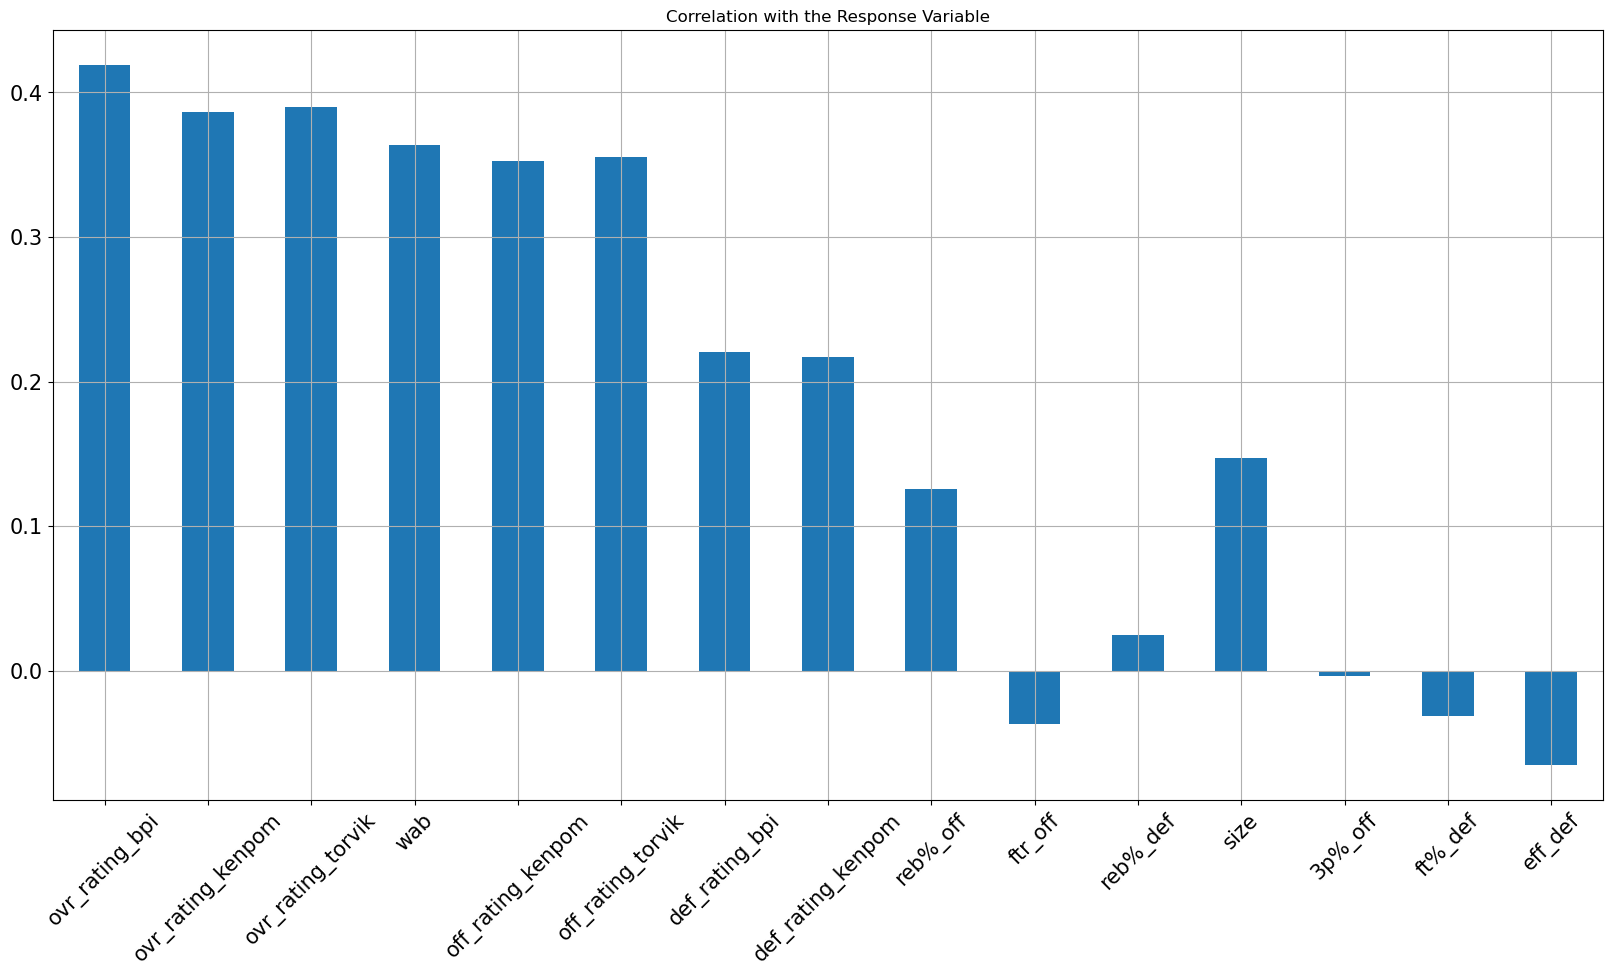

In [94]:
df2.drop(columns=['win', 's_f', 'a_f']).corrwith(df2.win).plot.bar(
    figsize=(20,10), title='Correlation with the Response Variable', fontsize=15,
    rot=45, grid=True
)

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns='win'),
                                                    df2['win'],
                                                    test_size=0.2,
                                                    random_state=0
                                                   )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 17)
(381,)
(96, 17)
(96,)


In [96]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

# I. Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [98]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test)) 

Accuracy Train:  0.7874015748031497
Accuracy Test:  0.7291666666666666
Precision Train:  0.8135048231511254
Precision Test:  0.7407407407407407
Recall Train:  0.9166666666666666
Recall Test:  0.9230769230769231
F1 Train:  0.8620102214650767
F1 Test:  0.8219178082191781
ROC_AUC Train:  0.682142857142857
ROC_AUC Test:  0.6228287841191067


# II. RFE Logistic Regression

In [100]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(clf, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(criterion='entropy', random_state=0),
    n_features_to_select=10)

In [101]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

In [102]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test)) 

Accuracy Train:  0.9973753280839895
Accuracy Test:  0.78125
Precision Train:  0.9963898916967509
Precision Test:  0.7682926829268293
Recall Train:  1.0
Recall Test:  0.9692307692307692
F1 Train:  0.9981916817359855
F1 Test:  0.8571428571428572
ROC_AUC Train:  0.9952380952380953
ROC_AUC Test:  0.6781637717121588


# III. Lasso Regression

In [103]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [104]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 17
selected features: 10
features with coefficients shrank to zero: 7


In [105]:
selected_feat

Index(['ovr_rating_bpi', 'def_rating_kenpom', 'reb%_off', 'ftr_off',
       'reb%_def', 'size', '3p%_off', 'eff_def', 's_f', 'a_f'],
      dtype='object')

In [106]:
X_train2 = X_train[['ovr_rating_bpi', 'def_rating_kenpom', 'reb%_off', 'ftr_off',
                    'reb%_def', 'size', '3p%_off', 'eff_def', 's_f', 'a_f']]
X_test2 = X_test[['ovr_rating_bpi', 'def_rating_kenpom', 'reb%_off', 'ftr_off',
                  'reb%_def', 'size', '3p%_off', 'eff_def', 's_f', 'a_f']]

clf = LogisticRegression(random_state=0)
clf.fit(X_train2, y_train)

LogisticRegression(random_state=0)

In [107]:
y_pred_train = clf.predict(X_train2)
y_pred_test = clf.predict(X_test2)

In [108]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test)) 

Accuracy Train:  0.7926509186351706
Accuracy Test:  0.71875
Precision Train:  0.8167202572347267
Precision Test:  0.7375
Recall Train:  0.9202898550724637
Recall Test:  0.9076923076923077
F1 Train:  0.8654173764906304
F1 Test:  0.8137931034482759
ROC_AUC Train:  0.6887163561076605
ROC_AUC Test:  0.615136476426799


# IV. SVM

In [109]:
from sklearn.svm import SVC

clf = SVC(random_state=0, kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [110]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [111]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.7795275590551181
Accuracy Test:  0.7083333333333334
Precision Train:  0.8
Precision Test:  0.7283950617283951
Recall Train:  0.927536231884058
Recall Test:  0.9076923076923077
F1 Train:  0.8590604026845639
F1 Test:  0.8082191780821918
ROC_AUC Train:  0.6590062111801243
ROC_AUC Test:  0.5990074441687345


# V. Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [113]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [114]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test)) 

Accuracy Train:  0.9973753280839895
Accuracy Test:  0.71875
Precision Train:  0.9963898916967509
Precision Test:  0.7209302325581395
Recall Train:  1.0
Recall Test:  0.9538461538461539
F1 Train:  0.9981916817359855
F1 Test:  0.8211920529801324
ROC_AUC Train:  0.9952380952380953
ROC_AUC Test:  0.5898263027295286


# VI. Full DF

In [115]:
comp_df = df[['year', 
              'region', 
              'round', 
              'high_bracket_seed', 
              'high_bracket_team',
              'low_bracket_seed', 
              'low_bracket_team', 
              'win']]
              
df = df.drop(columns=['year', 
                      'region', 
                      'round', 
                      'high_bracket_seed', 
                      'high_bracket_team',
                      'low_bracket_seed', 
                      'low_bracket_team', 
                      'win'
                     ])
log_pred = lr.predict(df)
comp_df['log_pred'] = log_pred
comp_df['log_comp'] = comp_df['win'] - comp_df['log_pred']
rf_pred = clf.predict(df)
comp_df['rf_pred'] = rf_pred
comp_df['rf_comp'] = comp_df['win'] - comp_df['rf_pred']

### Disappointing results. Goal is 84% (27 per year). Not even close.